# Backpropagation Lab





In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hende\AppData\Local\Temp\ipykernel_20896\2079374684.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [9]:
#Iris with no regularization
from scipy.io import arff

iris_arff = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_arff[0])

# expand target class into 3 columns
iris_df_dummies = pd.get_dummies(iris_df['class'], prefix='class')
iris_df = pd.concat([iris_df, iris_df_dummies], axis=1)
iris_df = iris_df.drop('class', axis=1)
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class_b'Iris-setosa',class_b'Iris-versicolor',class_b'Iris-virginica'
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [21]:
from sklearn.model_selection import train_test_split
X_columns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
X = iris_df[X_columns]
y = iris_df.drop(X_columns, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd', 
                    alpha=0, batch_size=1, learning_rate_init=0.01, shuffle=True, 
                    momentum=0, n_iter_no_change=50, max_iter=1000, verbose=1)
clf.fit(X_train, y_train)

In [23]:
print('Training set accuracy:\t', clf.score(X_train, y_train))
print('Test set accuracy:\t', clf.score(X_test, y_test))

Training set accuracy:	 0.9833333333333333
Test set accuracy:	 0.9666666666666667


*Discussion*

| num | epochs til convergence | train accuracy | test accuracy |
| --- | --------------------- | -------------- | ------------- |
| 1 | 287 | 0.983 | 0.867 |
| 2 | 243 | 0.975 | 0.967 |
| 3 | 249 | 0.975 | 1.000 |
| 4 | 269 | 0.992 | 0.967 |
| 5 | 249 | 0.983 | 0.967 |
| -- | -- | -- | -- |
| AVG | 259.4 | 0.982 | 0.954 |

The number of epochs until convergence and the accuracy on the training set both have fairly low spreads, which makes sense, because the dataset didn't change, just the train-test split and some randomness in the internal training shuffling. On the other hand, the accuracy on the test set has a slightly larger spread, from ~87% to 100%. This suggests that the generalizing ability of the model depends on the train-test split.

It surprised me that there was a train-test split that resulted in 100% accuracy on the test set. This could be because the dataset has only 150 rows. With a 80-20 train-test split, that leaves only 30 rows for the test set. It could be that that particular run had an "easy" test set. This is a probable explanation, because in one of the softmax probability results, there were several rows where one of the options had >99.9% probability (easier rows), but a few rows where the highest probability was less than 80%, with one row where the highest probability was less than 60% (harder rows). Therefore, it is probably that this one run with test accuracy of 100% just had an "easy" test set.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

In [3]:
from scipy.io import arff

iris_arff = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_arff[0])

# expand target class into 3 columns
iris_df_dummies = pd.get_dummies(iris_df['class'], prefix='class')
iris_df = pd.concat([iris_df, iris_df_dummies], axis=1)
iris_df = iris_df.drop('class', axis=1)
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class_b'Iris-setosa',class_b'Iris-versicolor',class_b'Iris-virginica'
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [18]:
#Iris with early stopping and validation scores graph
from sklearn.model_selection import train_test_split
X_columns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
X = iris_df[X_columns]
y = iris_df.drop(X_columns, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd', 
                    alpha=0, batch_size=1, learning_rate_init=0.01, shuffle=True, 
                    momentum=0, n_iter_no_change=50, max_iter=1000, early_stopping=True,
                    validation_fraction=0.1, verbose=1)
clf.fit(X_train, y_train)

In [20]:
print('Training set accuracy:\t', clf.score(X_train, y_train))
print('Test set accuracy:\t', clf.score(X_test, y_test))
print('Best validation score:\t', clf.best_validation_score_)

Training set accuracy:	 0.9583333333333334
Test set accuracy:	 0.8333333333333334
Best validation score:	 0.9166666666666666


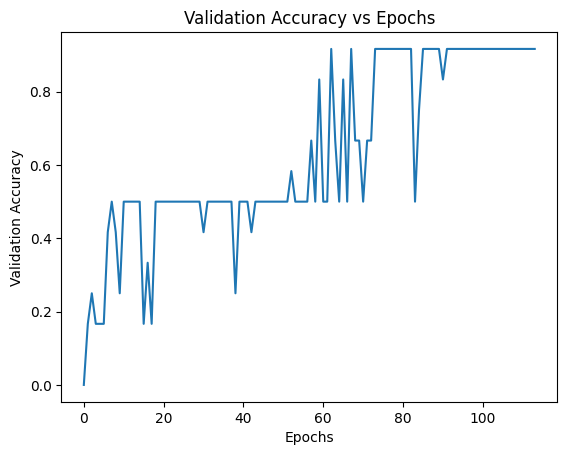

In [22]:
import matplotlib.pyplot as plt

epochs = list(range(114))

plt.plot(epochs, clf.validation_scores_)

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')

plt.show()

*Discussion of average values above and the validation score graph*

| num | epochs til convergence | train accuracy | test accuracy | best validation score |
| --- | --------------------- | -------------- | ------------- | --------------------- |
| 1 | 101 | 0.858 | 0.900 | 1.000 |
| 2 | 104 | 0.875 | 0.800 | 1.000 |
| 3 | 131 | 0.892 | 0.933 | 1.000 |
| 4 | 117 | 0.900 | 0.967 | 0.917 |
| 5 | 114 | 0.958 | 0.833 | 0.917 |
| -- | -- | -- | -- | -- |
| AVG | 113.4 | 0.897 | 0.887 | 0.967 |

The average number of epochs until convergence is much lower than the version without early stopping. This makes sense, because the early-stopping option will have the training stop early if it meets a certain criteria, which in this case was based on the improvement of the validation set. The average training accuracy and test accuracy were both below 90%, which makes sense because the whole dataset is fairly small, so doing a train-test split and then a train-validation split and then including the early-stopping attribute gave the model very little data and time to train. This led to lower average accuracy scores.

Another notable thing is that the best validation score was often 100%. This could be because the validation set is so small that one of the validations had an "easy" set. 

Lastly, the graph shows an interesting trend. It shows that the validation accuracy was in two stages. First, it stayed around 50% accuracy. Then, at around 60 epochs, it jumped up to around 90% accuracy and stayed around there for the remainder of the training. This jump could have been a turning point for the model, where it got around a local minimum or through a flat stretch and started descending quickly again, until it found another local minimum or flat stretch at around 90% accuracy.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

In [ ]:
from scipy.io import arff

iris_arff = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_arff[0])

# expand target class into 3 columns
iris_df_dummies = pd.get_dummies(iris_df['class'], prefix='class')
iris_df = pd.concat([iris_df, iris_df_dummies], axis=1)
iris_df = iris_df.drop('class', axis=1)
iris_df.head()

In [42]:
#Iris with Loss Regularization 
from sklearn.model_selection import train_test_split
X_columns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
X = iris_df[X_columns]
y = iris_df.drop(X_columns, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
alpha = 0.00001
clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd', 
                    alpha=alpha, batch_size=1, learning_rate_init=0.01, shuffle=True, 
                    momentum=0, n_iter_no_change=50, max_iter=1000, verbose=1)
clf.fit(X_train, y_train)

In [46]:
print('Training set accuracy:\t', clf.score(X_train, y_train))
print('Test set accuracy:\t', clf.score(X_test, y_test))
print('Best lost value:\t', clf.best_loss_)

Training set accuracy:	 0.9666666666666667
Test set accuracy:	 0.9666666666666667
Best lost value:	 0.11921492820018526


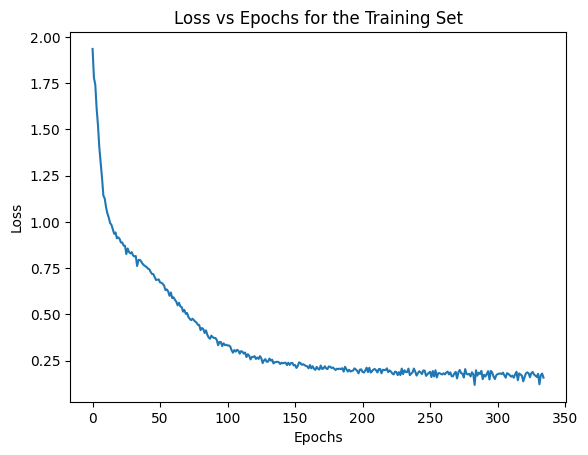

In [47]:
import matplotlib.pyplot as plt

epochs = list(range(len(clf.loss_curve_)))

plt.plot(epochs, clf.loss_curve_)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for the Training Set')

plt.show()

*Discussion and comparison between no regularization, early stopping and loss regularization*

| alpha | epochs til convergence | train accuracy | test accuracy | best lost value |
| ----- | --------------------- | -------------- | ------------- | --------------- |
| 0.1 | 197 | 0.625 | 0.5 | 1.598 |
| 0.01 | 266 | 0.875 | 0.833 | 0.771 |
| 0.001 | 248 | 0.983 | 0.967 | 0.238 |
| 0.0001 | 310 | 0.967 | 0.967 | 0.138 |
| 0.00001 | 335 | 0.967 | 0.967 | 0.119 |


The models with `alpha=0.0001` and `alpha=0.00001` where nearly identical in the result metrics that are shown in the table. The latter just had some more iterations and a lower "best lost value". On the other hand, the model with `alpha=0.1` is by far the worst performing model, with a training accuracy of 62.5% and a test accuracy of just 50%. In that case, the regularization kept the model too general and didn't allow it to fit the data enough. 

The models started seeing good results at around `alpha=0.001`, which suggests that it may be a good idea to keep `alpha` between `0.001` and `0.0001`. A higher alpha leads to a simpler model, and by the Occam's Razor principle, a simpler model is often the better model. 

In comparison to no regularization and early stopping, the loss regularization method seems to have the best results for this dataset. The early stopping method didn't have much of a chance, since the dataset is so small, so it could still be an effective method, but it needs more data to perform well. The no regularization method was fine, but seemed to over fit a bit. In contrast, the loss regularization method was able to curb over fitting and produced results that, based on the stats in the table, seemed to generalize well.

## 2 Hyperparameters 
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum. 

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

*Discuss these items here*

Since both datasets have the same number of rows for each target class, the baseline accuracy is directly related to the number of classes in each dataset. For the Iris dataset, there are 3 classes. Therefore, the baseline accuracy is $1/3=33.3\%$. For the Vowel dataset, there are 11 classes, so the baseline accuracy is $1/11=9.1\%$. 

The vowel data set will probably have lower accuracy than the Iris dataset because there are more ways to be wrong in the vowel dataset. Since there are more target classes, the model has to make more distinctions and be more accurate. With the Iris dataset, there were only two wrong answers, so the model had less to figure out. On the other hand, the Vowel dataset has 10 wrong answers, so the model will have to learn more and be more detailed and precise.

From analyzing the output from sweetviz, it appears that the "Train or Test", "Speaker Number", and "Sex" features have no correlation with the target. After further inspection, it looks like each speaker is either Train or Test, Male or Female, but has an equal number of each "Class". Therefore, these three features have no correlation with the target "Class" and so do not add any relevant information to the model. Thus, they should not be included in the training data.

In [15]:
# vowel report
from scipy.io import arff
import sweetviz as sv

vowel_arff = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_arff[0])

report = sv.analyze(vowel_df)
report.show_html()

Feature: Train or Test                       |▋         | [  7%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
# iris report
from scipy.io import arff

iris_arff = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_arff[0])

report_iris = sv.analyze(iris_df)
report_iris.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model a fair chance.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [ ]:
# Train with different learning rates
from scipy.io import arff

vowel_arff = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_arff[0])

# expand target class into 11 columns
vowel_df_dummies = pd.get_dummies(vowel_df['Class'], prefix='Class')
vowel_df = pd.concat([vowel_df, vowel_df_dummies], axis=1)
vowel_df = vowel_df.drop('Class', axis=1)

# drop irrelevant features
vowel_df = vowel_df.drop(['Train or Test', 'Speaker Number', 'Sex'], axis=1)

vowel_df.head()

In [22]:
X_columns = ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9']
X = vowel_df[X_columns]
y = vowel_df.drop(X_columns, axis=1)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
learning_rate=0.01
clf = MLPClassifier(hidden_layer_sizes=[20], activation='logistic', solver='sgd', 
                    alpha=0, batch_size=1, learning_rate_init=learning_rate, shuffle=True, 
                    momentum=0, n_iter_no_change=50, max_iter=1000, verbose=1)
clf.fit(X_train, y_train)

In [64]:
print('Training set accuracy:\t', clf.score(X_train, y_train))
print('Test set accuracy:\t', clf.score(X_test, y_test))

Training set accuracy:	 0.9097035040431267
Test set accuracy:	 0.7459677419354839


*Discuss your table and the effect of different learning rates on both training time and accuracy*

| learning rate | epochs til convergence | train accuracy | test accuracy |
| ------------- | --------------------- | -------------- | ------------- |
| 0.01 | 1000 (hit max iters) | 0.909 | 0.746 |
| 0.1 | 493 | 0.934 | 0.815 |
| 0.5 | 410 | 0.825 | 0.750 |
| 1.0 | 348 | 0.445 | 0.423 |
| 10 | 52 | 0.094 | 0.081 |

The learning rates of `0.01` and `0.1` did the best in this comparison. However, the run where `learning_rate=0.01` seemed to have more potential than the one where `learning_rate=0.1`. It just hit the maximum number of iterations before it could fully converge. On the other hand, the higher learning rates (`0.5`, `1.0`, and `10`) had low accuracy scores, with `learning_rate=10` producing a model that performed worse on the test set than the baseline accuracy. From the data on this table, there is a clear pattern. The higher the learning rate, the lower the number of epochs, and the lower the train and test accuracy. Thus, it is crucial to find a good balance between the number of epochs (and therefore time to train) and the accuracy of the model.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy. 
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [74]:
# Train with different numbers of hidden nodes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
learning_rate=0.1
num_hidden_nodes = 512

clf = MLPClassifier(hidden_layer_sizes=[num_hidden_nodes], activation='logistic', solver='sgd', 
                    alpha=0, batch_size=1, learning_rate_init=learning_rate, shuffle=True, 
                    momentum=0, n_iter_no_change=50, max_iter=1000, verbose=1)
clf.fit(X_train, y_train)

print('Training set accuracy:\t', clf.score(X_train, y_train))
print('Test set accuracy:\t', clf.score(X_test, y_test))

Iteration 1, loss = 3.86566715
Iteration 2, loss = 2.68014124
Iteration 3, loss = 2.43785717
Iteration 4, loss = 2.24985675
Iteration 5, loss = 2.11610898
Iteration 6, loss = 1.99468549
Iteration 7, loss = 1.90080761
Iteration 8, loss = 1.78776966
Iteration 9, loss = 1.69005199
Iteration 10, loss = 1.62487850
Iteration 11, loss = 1.53861968
Iteration 12, loss = 1.50630255
Iteration 13, loss = 1.42955697
Iteration 14, loss = 1.41476141
Iteration 15, loss = 1.36797419
Iteration 16, loss = 1.30303497
Iteration 17, loss = 1.30941457
Iteration 18, loss = 1.27217408
Iteration 19, loss = 1.22047214
Iteration 20, loss = 1.19415089
Iteration 21, loss = 1.15989879
Iteration 22, loss = 1.14760711
Iteration 23, loss = 1.12169442
Iteration 24, loss = 1.05531796
Iteration 25, loss = 1.06196855
Iteration 26, loss = 1.02446544
Iteration 27, loss = 1.00556527
Iteration 28, loss = 0.99285041
Iteration 29, loss = 0.94864048
Iteration 30, loss = 0.94670672
Iteration 31, loss = 0.93127938
Iteration 32, los

*Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy*

| num hidden nodes | epochs til convergence | train accuracy | test accuracy |
| ---------------- | --------------------- | -------------- | ------------- |
| 1 | 189 | 0.000 | 0.000 |
| 2 | 135 | 0.152 | 0.101 |
| 4 | 213 | 0.449 | 0.444 |
| 8 | 239 | 0.635 | 0.613 |
| 16 | 477 | 0.937 | 0.778 |
| 32 | 751 | 1.000 | 0.819 |
| 64 | 530 | 1.000 | 0.875 |
| 128 | 538 | 1.000 | 0.915 |
| 256 | 501 | 1.000 | 0.927 |
| 512 | 557 | 1.000 | 0.871 |

It surprised me that the accuracy kept improving for so long (with more and more hidden nodes)

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [ ]:
# Train with different momentum values

*Discuss your table and the effect of momentum on both training time and accuracy*

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html) 
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not always blindly assume that a tool will get you the results you expect and that you may need to consider multiple approaches.

In [ ]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( .001, ?, ....), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([8], [?], ...),
              'momentum':(0, ?, ...)
grid = GridSearchCV(clf, parameters)
grid.fit(X,Y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=?, scale=?), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [?], ...), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,Y)
print(search.best_params_)
print(search.best_score_)

*Discussion and comparison of grid and randomized parameter search*

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great place to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [ ]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(clf.predict(X_test), y_test))

*Discussion*

### 3.2 (10%) - Other MLP Hyperparameters 
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required. 

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Run with different hyperparameters

*Discussion*

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one activation function for all hidden and output nodes if you want (e.g. logistic activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening that implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent 
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
